In [42]:
from dateutil.parser import parse
from matplotlib import pyplot as plt
%matplotlib inline
import math
import pandas as pd
import numpy as np

In [43]:
pd.set_option('mode.chained_assignment', None)
feb = pd.read_csv('yellow_tripdata_2017-02.csv')
feb.head()
june = pd.read_csv('yellow_tripdata_2017-06.csv')
june.head()
feb.describe()
june.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06,9.656993e+06
mean,1.546961e+00,1.623943e+00,2.978617e+00,1.045527e+00,1.626235e+02,1.607379e+02,1.334040e+00,1.328727e+01,3.413314e-01,4.972247e-01,1.878480e+00,3.376697e-01,2.996046e-01,1.664632e+01
std,4.977898e-01,1.264608e+00,5.704095e+00,5.665036e-01,6.675223e+01,7.047343e+01,4.929622e-01,2.151675e+02,4.623294e-01,7.625157e-02,2.696221e+00,2.022799e+00,1.441594e-02,2.153387e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.056000e+01,-5.000000e-01,-7.400000e+01,-1.250000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.185000e+01
75%,2.000000e+00,2.000000e+00,3.100000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.817000e+01
max,2.000000e+00,9.000000e+00,9.496980e+03,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.304618e+05,2.250000e+01,1.400000e+02,4.440000e+02,9.900000e+02,1.000000e+00,6.304631e+05


In [5]:
# Date Parser Check
# theDate = parse('2017-02-03 02:03:50')
# print(theDate.month)
# print(theDate.strftime('%b'))    # extract numeric month as an abbrivated string format month
# print(theDate.strftime('%X')[:-3])   # http://strftime.org/   ====> hour:minute

#File too large to fully parse. Discover top areas and convert to hour time to find frequent pickup hours.
# feb['trip_start_month'] = feb['tpep_pickup_datetime'].iloc[:10].apply(lambda x: parse(x).strftime('%b'))
# feb['trip_start_month'] = feb['tpep_pickup_datetime'].isin(['8.0,32.0,28.0,6.0,7.0'])].apply(lambda x: parse(x).strftime('%m'))

# feb['time'] = feb['tpep_pickup_datetime'].apply(lambda x: parse(x).strftime('%X'))

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06,9.168825e+06
mean,1.547617e+00,1.624975e+00,2.801204e+00,1.039424e+00,1.634694e+02,1.611433e+02,1.324902e+00,1.243636e+01,3.303402e-01,4.975689e-01,1.790723e+00,2.741688e-01,2.996484e-01,1.563245e+01
std,4.977275e-01,1.267718e+00,3.541775e+00,6.216132e-01,6.663460e+01,7.052562e+01,4.876912e-01,1.729799e+02,4.426037e-01,7.308792e-02,2.491725e+00,1.684191e+00,1.377835e-02,1.731556e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.200000e+02,-5.350000e+01,-5.000000e-01,-1.571000e+01,-1.500000e+01,-3.000000e-01,-2.358000e+02
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.162000e+01
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.360000e+00,0.000000e+00,3.000000e-01,1.715000e+01
max,2.000000e+00,9.000000e+00,3.240000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.617702e+05,6.980000e+01,1.018000e+02,4.780000e+02,8.105000e+02,3.000000e-01,3.617720e+05


In [22]:
# The counts of pickup by different PUIDLocation and DOIDLocation areas in descending order
feb['PULocationID'].value_counts().sort_values(ascending=False)

161    347809
237    342756
186    324149
236    321537
234    314375
230    312275
162    309016
170    292041
79     291471
48     283544
142    257701
163    241636
239    229832
164    222349
107    220736
68     218766
249    208857
141    205365
138    193930
100    187081
132    186070
90     178624
231    176909
238    174285
229    170555
113    160109
263    157616
264    151877
140    151215
148    145977
        ...  
23         14
86         13
64         12
214        12
15         11
251        10
117         9
201         8
46          7
2           6
118         6
245         6
206         5
172         4
84          4
109         4
156         4
184         4
105         3
58          3
115         3
59          3
187         3
44          2
204         2
27          2
176         2
30          2
199         1
99          1
Name: PULocationID, Length: 261, dtype: int64

In [23]:
feb['DOLocationID'].value_counts().sort_values(ascending=False)

236    332841
161    330564
237    305275
170    289708
230    270437
162    268557
234    264986
186    254376
48     243323
79     241071
142    234910
239    219160
163    214111
141    208540
68     207293
107    197171
164    191171
238    182423
246    180252
249    164689
231    164231
263    160700
229    158606
140    156653
90     145664
100    139812
264    139231
113    137985
137    132556
233    126717
        ...  
214       180
221       179
6         174
206       161
96        156
46        151
118       145
8         139
111       132
251       131
172       118
115        93
109        92
245        89
154        83
156        80
27         70
84         55
253        53
204        48
176        45
59         43
184        40
5          40
187        31
30         29
44         29
99          4
2           4
105         3
Name: DOLocationID, Length: 261, dtype: int64

(0, 1000)

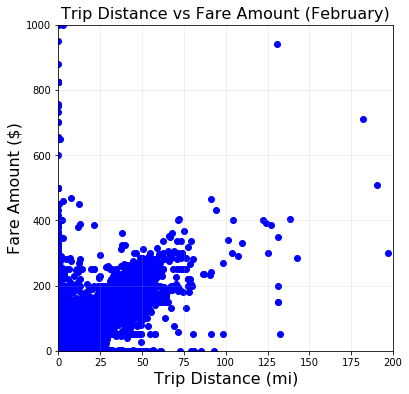

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
axes.scatter(feb["trip_distance"], feb["fare_amount"], color = "blue")
plt.xlim(0,200)
plt.ylim(0,)
axes.grid(alpha=0.25)
axes.set_xlabel("Trip Distance (mi)", fontsize=16)
axes.set_ylabel("Fare Amount ($)", fontsize=16)
axes.set_title("Trip Distance vs Fare Amount (February)", fontsize=16)
plt.xlim(0,200)
plt.ylim(0,1000)

(0, 1000)

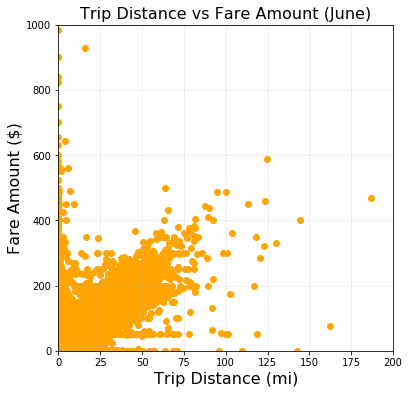

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
axes.scatter(june["trip_distance"], june["fare_amount"], color = "orange")
plt.xlim(0,200)
plt.ylim(0,)
axes.grid(alpha=0.25)
axes.set_xlabel("Trip Distance (mi)", fontsize=16)
axes.set_ylabel("Fare Amount ($)", fontsize=16)
axes.set_title("Trip Distance vs Fare Amount (June)", fontsize=16)
plt.xlim(0,200)
plt.ylim(0,1000)

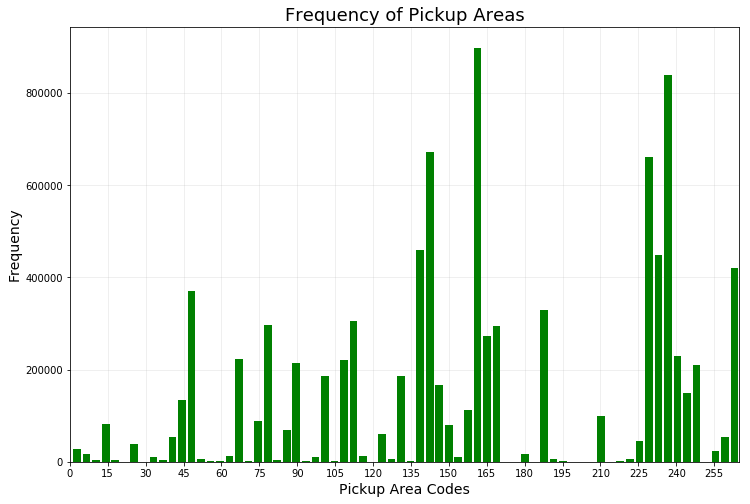

In [41]:
xrange = list(np.arange(0, 265, 15 ))
# print(xrange)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

feb["PULocationID"].hist(ax=ax, bins= 70, rwidth=0.8, color="green")
ax.set_xlabel("Pickup Area Codes", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Frequency of Pickup Areas", fontsize=18)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xticks(xrange)
ax.set_xlim(0, 265)
fig.subplots_adjust(hspace=.5)

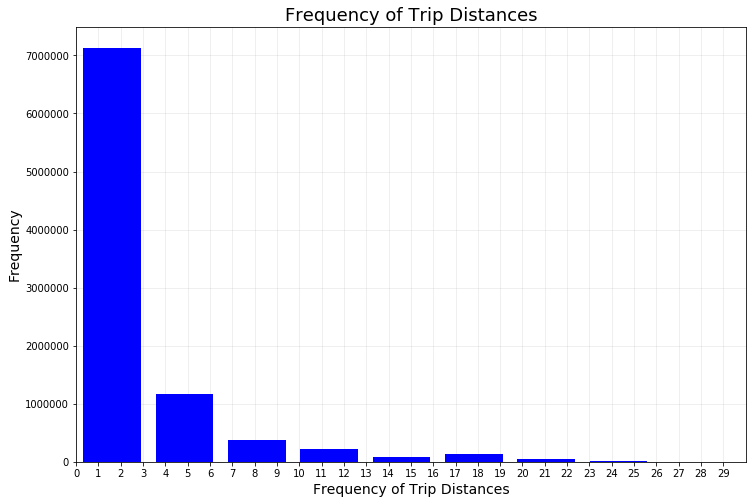

In [19]:
xrange = list(np.arange(0, 30, 1))
# print(xrange)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

feb["trip_distance"].hist(ax=ax, bins= 100, rwidth=0.8, color="blue")
ax.set_xlabel("Frequency of Trip Distances", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Frequency of Trip Distances", fontsize=18)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xticks(xrange)
ax.set_xlim(0, 30)
fig.subplots_adjust(hspace=.5)

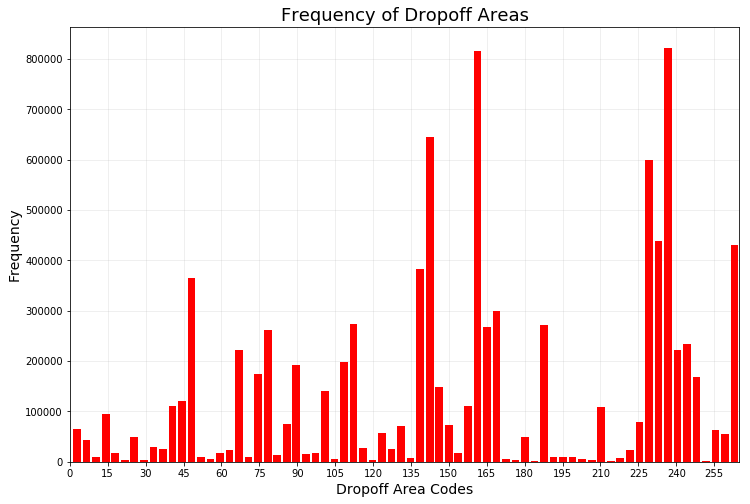

In [20]:
xrange = list(np.arange(0, 265, 15 ))
# print(xrange)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

feb["DOLocationID"].hist(ax=ax, bins= 70, rwidth=0.8, color="red")
ax.set_xlabel("Dropoff Area Codes", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Frequency of Dropoff Areas", fontsize=18)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xticks(xrange)
ax.set_xlim(0, 265)
fig.subplots_adjust(hspace=.5)

In [24]:
# Hour breakup for frequent times.
pickup = pd.DataFrame(feb, columns = ['PULocationID','tpep_pickup_datetime'])
top_pickups = pickup[pickup['PULocationID'].isin([161,237,186,236,234,230,162])]
top_pickups['time'] = top_pickups['tpep_pickup_datetime'].apply(lambda x: parse(x).strftime('%X'))
top_pickups.head(20)

,PULocationID,tpep_pickup_datetime,time
4,186,2017-02-03 04:57:38,04:57:38
6,234,2017-02-21 23:23:09,23:23:09
9,230,2017-02-24 12:17:57,12:17:57
18,230,2017-02-01 00:00:02,00:00:02
22,162,2017-02-01 00:00:05,00:00:05
30,161,2017-02-01 00:00:10,00:00:10
34,162,2017-02-01 00:00:11,00:00:11
37,230,2017-02-01 00:00:13,00:00:13
41,186,2017-02-01 00:00:15,00:00:15
46,161,2017-02-01 00:00:17,00:00:17


In [31]:
time = top_pickups
time.head()
time = time.drop(['PULocationID','tpep_pickup_datetime'], axis=1)
time.info()
time.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271917 entries, 4 to 9168820
Data columns (total 1 columns):
time    object
dtypes: object(1)
memory usage: 34.7+ MB


,time
4,04:57:38
6,23:23:09
9,12:17:57
18,00:00:02
22,00:00:05


In [35]:
time['hour'] = time['time'].apply(lambda x: parse(x).strftime('%H'))
time.head(20)

,time,hour
4,04:57:38,04
6,23:23:09,23
9,12:17:57,12
18,00:00:02,00
22,00:00:05,00
30,00:00:10,00
34,00:00:11,00
37,00:00:13,00
41,00:00:15,00
46,00:00:17,00


In [36]:
hour_count = time.groupby('hour')['hour'].count().sort_values(ascending=False)
print(hour_count)

hour
18    162982
19    154134
17    142690
20    136503
14    132881
15    131162
21    130762
12    125525
13    124785
16    123280
22    117934
11    117315
10    105134
09    102075
08     99480
23     85346
07     79707
00     57354
06     44319
01     34107
02     21352
05     15669
03     14355
04     13066
Name: hour, dtype: int64
